In [1]:
import cv2
from forward import wm_au_emb
from utils import PSNR
import numpy as np
from matplotlib import pyplot as plt
from detect import *
from recovery import stage1_recovery,stage2_recovery,stage3_recovery

In [2]:
image1 = cv2.imread("D:\\Dat_Hoctap\\2023\\Tamper_Recover\Data\\png\\peppers.png")
w_image1 = wm_au_emb(image1,(13,17,19))
print("PSNR1",PSNR(image1,w_image1))

PSNR1 46.15815020123306


In [3]:
print("PSNR1",cv2.PSNR(image1,w_image1))

PSNR1 46.15815020123306


In [4]:
N = 512
t_all_image = np.random.randint(
    low=0, 
    high=256,
    size=(N, N, 3),
    dtype=np.uint8
)

In [5]:
tamper_image = w_image1.copy()
tamper_image[256-81:256+81,256-81:256+81,:]= t_all_image[256-81:256+81,256-81:256+81,:]
lv1_matrix = level_one_detection(tamper_image)
lv2_matrix = lv1_matrix.copy()
lv3_matrix = lv1_matrix.copy()
for channel in range(3):
    lv2_matrix[:,:,channel] = level_two_detection(lv1_matrix[:,:,channel])
    lv3_matrix[:,:,channel] = level_three_detection(lv2_matrix[:,:,channel])

In [6]:
recover_img,lv4_BGR,smooth_BGR= stage1_recovery(t_img=tamper_image,key=(13,17,19))
r2_image = stage2_recovery(recover_img,smooth_matrix=smooth_BGR,thresh=16)
r3_image = stage3_recovery(r2_img=r2_image,lv4_matrix=lv4_BGR)

In [19]:

print(cv2.PSNR(recover_img,image1))
print(cv2.PSNR(r2_image,image1))

26.4517554239429
27.059394302704472


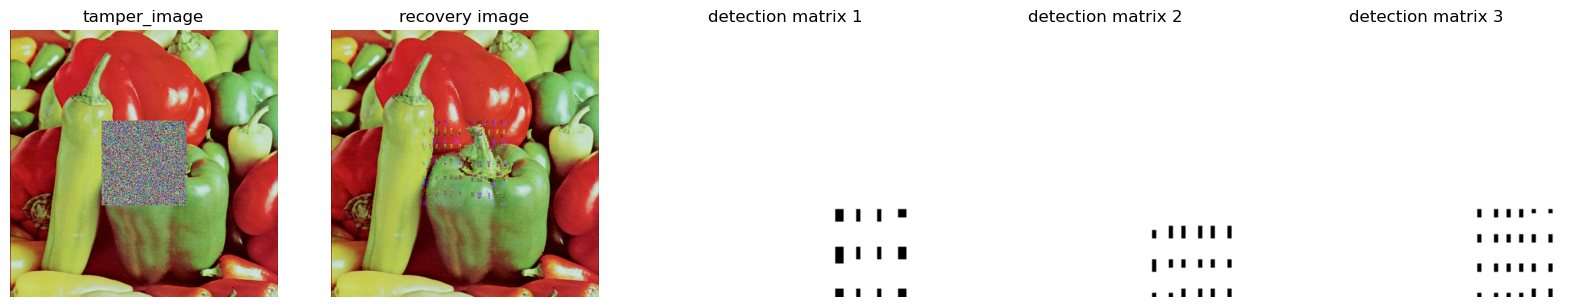

In [8]:
fig, axes = plt.subplots(1, 5,figsize = (20,10))
axes[0].set_axis_off()
axes[1].set_axis_off()
axes[2].set_axis_off()
axes[3].set_axis_off()
axes[4].set_axis_off()

axes[0].set_title(f'tamper_image')
axes[1].set_title(f'recovery image')
axes[2].set_title(f'detection matrix 1')
axes[3].set_title(f'detection matrix 2')
axes[4].set_title(f'detection matrix 3')

axes[0].imshow(cv2.cvtColor(tamper_image,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)
axes[1].imshow(cv2.cvtColor(r2_image,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)
axes[2].imshow(lv4_BGR[:,:,0], cmap=plt.cm.gray,vmax=1,vmin=0)
axes[3].imshow(lv4_BGR[:,:,1], cmap=plt.cm.gray,vmax=1,vmin=0)
axes[4].imshow(lv4_BGR[:,:,2], cmap=plt.cm.gray,vmax=1,vmin=0)

In [9]:
print(np.sqrt(512*512*8/10))

457.9467217919569


In [10]:
a =np.ones((2*100,2*100,3),dtype= np.bool)

C:\Users\DuyDat\AppData\Local\Temp\ipykernel_15064\3995636780.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  a =np.ones((2*100,2*100,3),dtype= np.bool)


In [11]:
a[:3,:3,2] = 0

In [12]:
print(a[:3,:3,1])

[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]


In [13]:
np.abs(int(image1[0,0,2])-int(image1[0,100,2]))

104

In [14]:
print(np.mean([image1[0,0,2],image1[0,100,2]]))

153.0


In [15]:
def enhance_pixel(pixel,nb_pixel,thresh):
    print(pixel,nb_pixel)
    if np.abs(int(nb_pixel)-int(pixel))>thresh:
        return nb_pixel
    return np.mean([pixel,nb_pixel]).round().astype(np.uint8)

In [16]:
print(enhance_pixel(image1[0,0,2],image1[0,100,2],thresh=16))

101 205
205


In [17]:
image1[0,0,2]

101

In [18]:
image1[0,100,2]

205